In [3]:
#let's start with importing all the necessary libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape     #checking the data dimension

(4177, 9)

In [6]:
df.info() #deatils about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


It looks like except sex every detail is continuous data type. Our target variable is 'Rings'. And remaining columns are features i.e. independent variables has 8 columns.

We can also observe that here we have one categorical data 'Sex'.

We can also observe there is no null value present in our dataset.

In [7]:
#statistical summary
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


It looks like data has no null values. And data is somewhat balance, except 'Height has zero value

In [9]:
# There is zero in Height, lets deal with that zero first
#replacing zero values with the mean of the column i.e imputation using mean method(this method can only be applied on continuous data).

df['Height']= df['Height'].replace(0,df['Height'].mean())
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
# determine unique values in target variable i.e 'Rings'
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

It can be seen that in data we don't have any NaN or null values

In [11]:
#once again checking null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Since no null value we can proceed ahead.

# EDA

In [12]:
#Making DataFrame for nominal data
df_visualize_nominal=df[['Sex']]


M    1528
I    1342
F    1307
Name: Sex, dtype: int64


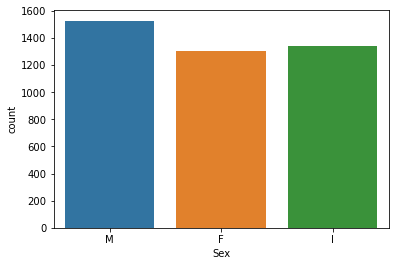

In [13]:
# Visualization of nominal data.
ax=sns.countplot(x="Sex", data=df_visualize_nominal)
print(df_visualize_nominal["Sex"].value_counts())

From above observation we can say that the data is not imbalanced, number of male is 1528, female is 1342 and infant is 1307.

In [215]:
# performing categorical variable to numeric variable with label encoder to make uniform data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [216]:
df.dtypes   #determining the data type of all the columns

Sex                 int32
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [217]:
# Let's see the correlation of ordinal values i.e. continuous data
corr=df.corr()
corr

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042293,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827748,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833931,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042293,0.827748,0.833931,1.000000,0.819624,0.775406,0.798653,0.819455,0.557502
Whole weight,-0.021391,0.925261,0.925452,0.819624,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.775406,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798653,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.819455,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557502,0.540390,0.420884,0.503819,0.627574,1.000000


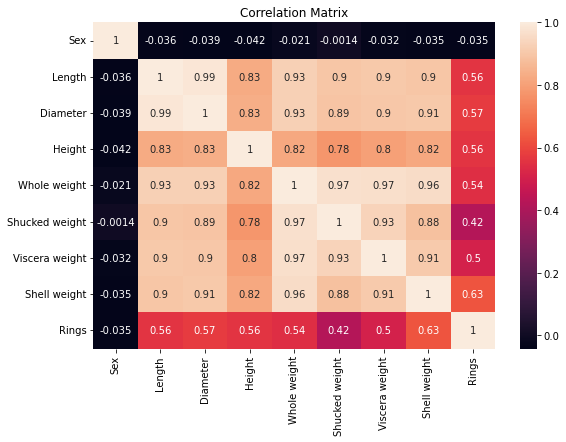

In [218]:
#visual representation of correlation graph. We are using Heatmap for correlation matrix.
#size of canvas
plt.figure(figsize=[9,6])
#plot the correlation matrix
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()


from above observation we can say that, our data has some multicolinearity. And also, we also include our categorical data here

In [219]:
## EDA

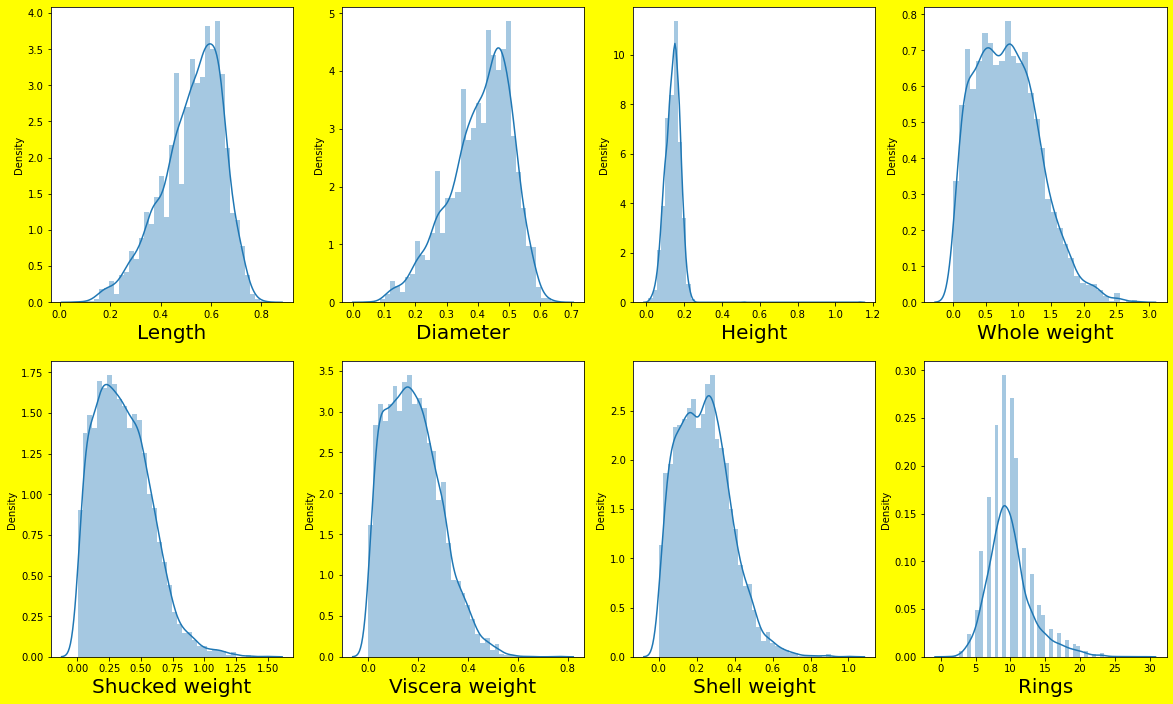

In [249]:
# Visualization of Continuous data.(EDA)
data_conti=df.drop(['Sex'], axis=1)

#let's see how our data is distributed for every coulmn

plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber=1

for column in data_conti:
    if plotnumber<=8:                           #as there are 8 column in the dataset
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data_conti[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()


from above graphs we can observe that, there is skewness present in the data.


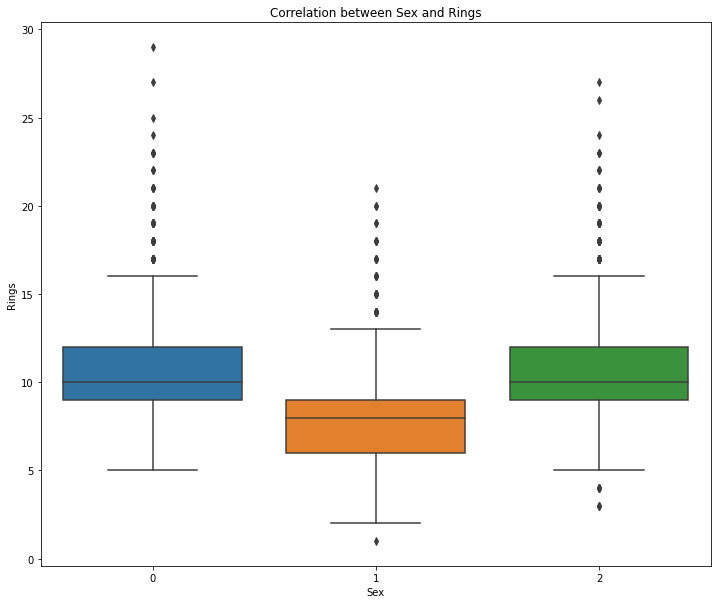

In [250]:
# correlation between 'Sex' and "rings"
plt.figure(figsize=(12,10))
sns.boxplot(df['Sex'],df['Rings'])
plt.title("Correlation between Sex and Rings")
plt.show()


<Figure size 504x432 with 0 Axes>

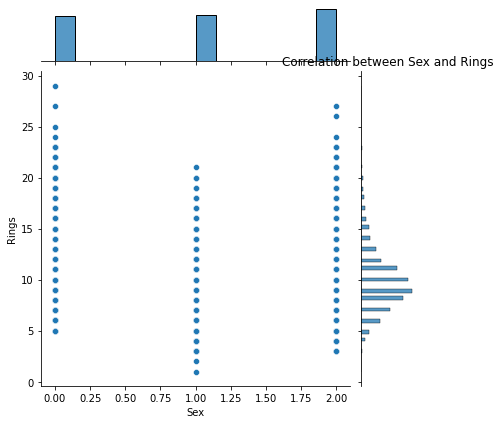

In [251]:
# correlation between 'Sex' and "rings"
plt.figure(figsize=(7,6))
sns.jointplot(df['Sex'],df['Rings'])
plt.title("Correlation between Sex and Rings")
plt.show()


In [252]:
# preprocessing in entire data set

#splitting the entire data into independent variable and target variable in x and y before removing skewness
x=df.drop('Rings', axis=1)
y=df['Rings']
 

In [253]:
x.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [254]:
#checking skewness

#x.skew().sort_values(ascending=False)




Assuming the threshold for skewness (-0.65, 0.65).From above observation we can see that skewness is present in 'Height', 'Shucked weight'. We do not check for skewness in categorical data, so Sex_f, Sex_I is ignored here for skewness.

In [255]:
# Removing skewness
#data_skew=df_new[['Height','Shucked weight','Shell weight','Viscera weight','Whole weight','Diameter','Length']]
#from sklearn.preprocessing import power_transform

#x_new= power_transform(data_skew)






In [256]:
# checking skewness in x_new 
#pd.DataFrame(x_new, columns=data_skew.columns).skew().sort_values(ascending=False)




From above observation we can see that we have removed skewness and its value is reduced as low as possible.range(-0.11,0.11)


In [257]:
#df_modi=df.drop(['Shucked weight','Height','Viscera weight','Shell weight','Whole weight','Diameter','Length' ], axis=1)
#data_skew=pd.DataFrame(x_new, columns=data_skew.columns)
#df_modi= pd.concat([df_modi,data_skew], axis=1)
#df_modi





# Checking Outliers

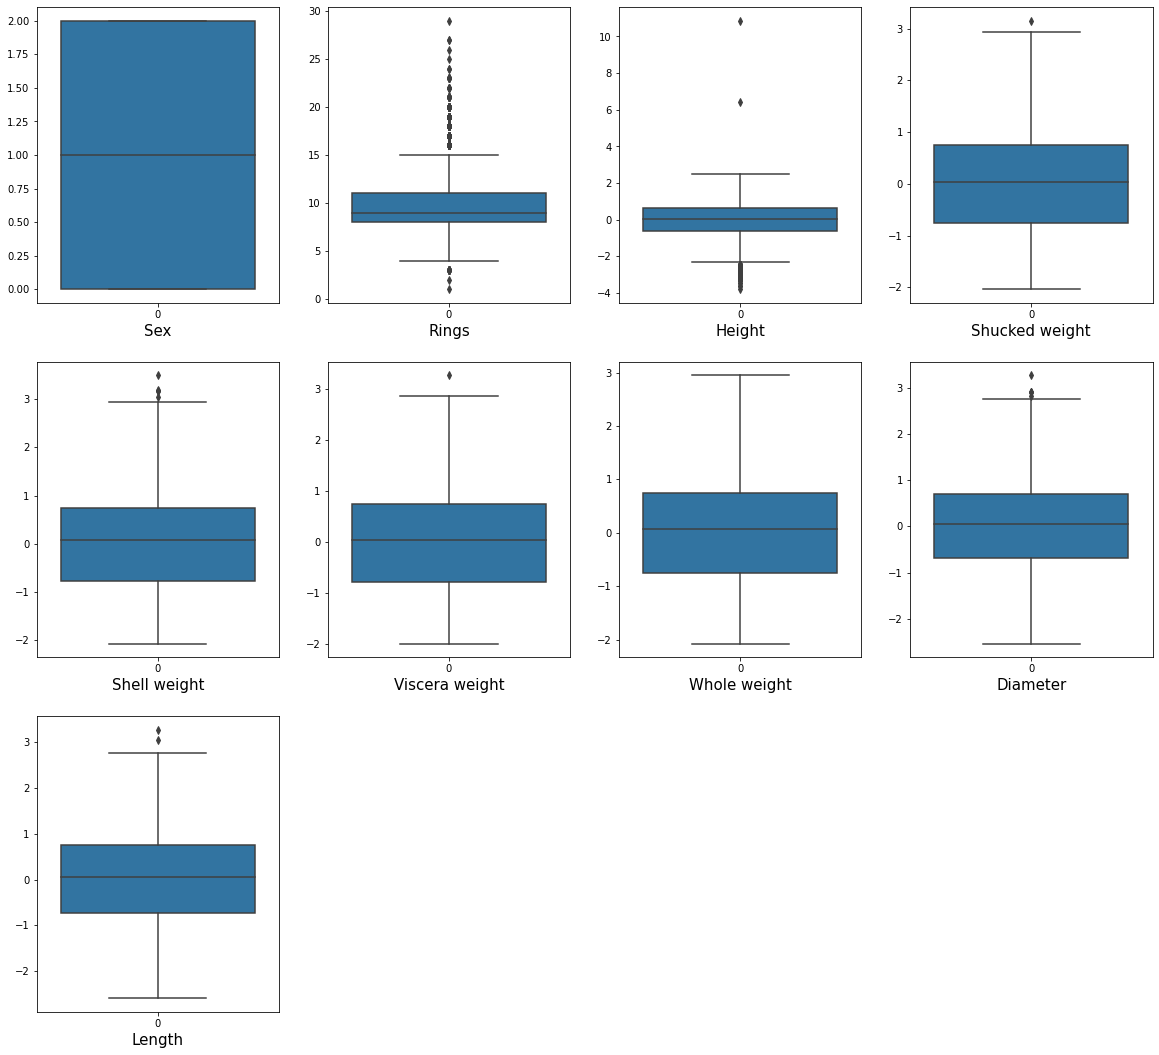

In [258]:
#Visualize the outliers using boxplot (Outlier cannot applied to categorical data, this technique can be done only in continuous data)

plt.figure(figsize=(20,25))
graph=1

for column in df_modi:
    if graph<=11:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=df_modi[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()







There are few data which can be seen out of the line, lets check weather they are outliers or not.Assuming they are close to whiskers, so they might not be outlier. Also remove target column 'Rings' going further
Let's check for Outlier


In [259]:
#checking outliers : On the Features
x=df.drop(['Rings'], axis=1)

from scipy.stats import zscore
threshold=3
z=zscore(x)
z





,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151980,-0.574558,-0.432149,-1.068874,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,-1.448986,-1.439929,-1.188748,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,0.050033,0.122130,-0.109881,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.699476,-0.432149,-0.349630,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,-1.615544,-1.540707,-1.428497,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...,...
4172,-1.280690,0.341509,0.424464,0.609363,0.118813,0.047908,0.532900,0.073062
4173,1.151980,0.549706,0.323686,-0.109881,0.279929,0.358808,0.309362,0.155685
4174,1.151980,0.632985,0.676409,1.568356,0.708212,0.748559,0.975413,0.496955
4175,-1.280690,0.841182,0.777187,0.249741,0.541998,0.773341,0.733627,0.410739


In [260]:
df_new_z=df[(zscore(x)<3).all(axis=1)]
df_new_z




,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


1.we do remove outliers from the data, now lets calculate data% loss

%loss= 11/4177*100=0.26%
which is very minimal.

2. we do not check skewness and outliers for categorical data and target data.


In [261]:
#final data description.
df_new_z.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 4103 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4103 non-null   int32  
 1   Length          4103 non-null   float64
 2   Diameter        4103 non-null   float64
 3   Height          4103 non-null   float64
 4   Whole weight    4103 non-null   float64
 5   Shucked weight  4103 non-null   float64
 6   Viscera weight  4103 non-null   float64
 7   Shell weight    4103 non-null   float64
 8   Rings           4103 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 304.5 KB


In [262]:
df_new_z.shape  #checking the dimension


(4103, 9)

# Scaling and Training the data

In [263]:
X=df_new_z.drop(['Rings'], axis=1)
y=df_new_z['Rings']


In [264]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [265]:
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Rings, dtype: int64

In [266]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

X_scalar=scaler.fit_transform(X)

In [267]:
for i in range(0,100):
    X_train,X_test,y_train,y_test= train_test_split(X_scalar,y,test_size=0.20,random_state=i)
    lr.fit(X_train,y_train)
    pred_train=lr.predict(X_train)
    pred_test= lr.predict(X_test)
    print("At random state", i , "the training accuracy is : ", {r2_score(y_train,pred_train)})
    print("At random state ", i, "the testing score is : ", {r2_score(y_test,pred_test)})
    print('\n')

At random state 0 the training accuracy is :  {0.5208960934492668}
At random state  0 the testing score is :  {0.5765772580412232}


At random state 1 the training accuracy is :  {0.5275695459645637}
At random state  1 the testing score is :  {0.5484759305177671}


At random state 2 the training accuracy is :  {0.5366000239650036}
At random state  2 the testing score is :  {0.5113840408778001}


At random state 3 the training accuracy is :  {0.5359920282104469}
At random state  3 the testing score is :  {0.5187485050381226}


At random state 4 the training accuracy is :  {0.5284611499622698}
At random state  4 the testing score is :  {0.5472610208369736}


At random state 5 the training accuracy is :  {0.5430974652331566}
At random state  5 the testing score is :  {0.48697960666312157}


At random state 6 the training accuracy is :  {0.5349309242776175}
At random state  6 the testing score is :  {0.5187302694287549}


At random state 7 the training accuracy is :  {0.5264530694079872}
A

In [274]:
#Linear regression:

X_train,X_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.2, random_state=8)
lr.fit(X_train,y_train)
pred_test=lr.predict(X_test)
print(r2_score(y_test,pred_test))


0.536638233148135


# Cross validation of the model

In [275]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    
    cv_score=cross_val_score(lr,X_scalar,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cv fold ", j, " the Cv score is ", cv_mean, "and accuracy score for training is ", train_accuracy, "& test accuracy is", test_accuracy)
    print('\n')

At cv fold  2  the Cv score is  0.5265442268630358 and accuracy score for training is  -0.5487665776925941 & test accuracy is 0.536638233148135


At cv fold  3  the Cv score is  0.5006420078934124 and accuracy score for training is  -0.5487665776925941 & test accuracy is 0.536638233148135


At cv fold  4  the Cv score is  0.41249518270474 and accuracy score for training is  -0.5487665776925941 & test accuracy is 0.536638233148135


At cv fold  5  the Cv score is  0.40174558533403804 and accuracy score for training is  -0.5487665776925941 & test accuracy is 0.536638233148135


At cv fold  6  the Cv score is  0.41553226857645126 and accuracy score for training is  -0.5487665776925941 & test accuracy is 0.536638233148135


At cv fold  7  the Cv score is  0.43958864962916583 and accuracy score for training is  -0.5487665776925941 & test accuracy is 0.536638233148135


At cv fold  8  the Cv score is  0.3705681762226599 and accuracy score for training is  -0.5487665776925941 & test accuracy 

since cv has not much impact on accuracy so we can select 2.

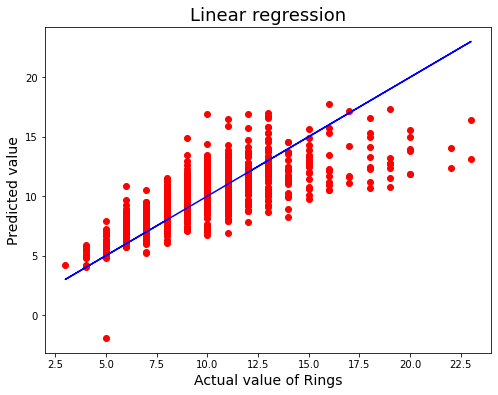

In [276]:
# here we have handled the problem of overfitting by checking the training and testing score

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual value of Rings', fontsize=14)
plt.ylabel('Predicted value', fontsize= 14)
plt.title('Linear regression', fontsize=18)
plt.show()

Can't say about best fit yet, let's check few more model.

# Regularization:

In [277]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters= {'alpha': [.0001,.001,.01,.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [278]:
ls=Lasso(alpha= 0.001, random_state=0)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)

lss=r2_score(y_test, pred_ls)
lss

0.5357782531590457

# Ensemble technique

In [279]:
from sklearn.ensemble import RandomForestRegressor

parameters= {'criterion':['mse', 'mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [246]:
rf=RandomForestRegressor(criterion='mae', max_features='sqrt')
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
pred_rf=rf.predict(X_test)

rfs=r2_score(y_test, pred_rf)
print('R2 score is : ',rfs)

rfscore=cross_val_score(rf,X,y,cv=7)
rfc=rfscore.mean()
print('Cross validation score is : ', rfc)

R2 score is :  0.5691079346680974
Cross validation score is :  0.48730930871719974


In [248]:
# import mean squared error from sklearn.metric
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, pred_ls)))

Root Mean Squared Error is:  2.1340395771983576


In [281]:
# saving best performing model
import pickle
filename= "abalone.pkl"
pickle.dump(rf, open(filename, 'wb'))